In [1]:
# import libraries
import numpy as np
import os

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
# import csv file
# pay attention to which file is being used
df = pd.read_csv('Archive/df_product_active2.csv')

In [3]:
df

,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,...,total_sales,buy_sell_ratio,avg_orders_per_month,avg_discount_per_order,first_order_month,first_order_year,first_order_year_month,PLC_Category,avg_mth_profit_contribution,avg_mth_profit_contribution_category
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Furniture,Bookcases,2017-09-04,2017-09-04,0,0,117,9,...,825.174,1.250000,0.250000,0.300000,9,2017,2017-09,2_GROWTH,-30.226154,1_Low
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,2014-11-28,2017-05-30,914,914,214,10,...,1064.624,1.162791,0.079787,0.100000,11,2014,2014-11,5_OBSOLETE,0.794179,3_High
2,FUR-BO-10000362,Sauder Inglewood Library Bookcases,Furniture,Bookcases,2014-05-26,2016-06-04,740,740,574,14,...,2154.348,1.298701,0.114155,0.130000,5,2014,2014-05,5_OBSOLETE,12.615551,3_High
3,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,2014-08-08,2017-12-19,1229,1229,11,21,...,723.842,1.190476,0.145161,0.183333,8,2014,2014-08,3_MATURITY,-3.249207,1_Low
4,FUR-BO-10000711,"Hon Metal Bookcases, Gray",Furniture,Bookcases,2014-06-14,2014-08-19,66,66,1229,12,...,851.760,1.369863,0.046332,0.000000,6,2014,2014-06,5_OBSOLETE,104.534182,3_High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,...,516.530,1.408451,0.070978,0.133333,7,2014,2014-07,3_MATURITY,2.115508,1_Low
1890,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,...,1085.238,1.333333,0.110051,0.120000,4,2014,2014-04,5_OBSOLETE,3.845844,2_Medium
1891,TEC-PH-10004924,"SKILCRAFT Telephone Shoulder Rest, 2"" x 6.5"" x...",Technology,Phones,2015-10-23,2016-08-20,302,302,497,8,...,56.164,1.369863,0.112641,0.066667,10,2015,2015-10,5_OBSOLETE,1.292026,1_Low
1892,TEC-PH-10004959,Classic Ivory Antiqueï¾ Telephoneï¾ ZL1810,Technology,Phones,2014-11-11,2015-09-03,296,296,849,4,...,341.666,1.333333,0.052402,0.100000,11,2014,2014-11,5_OBSOLETE,4.073919,2_Medium


In [4]:
# eliminate columns in dataframe df
# rename 'total_profit' to 'Amount', 'count_orders' to 'Frequency', 'days_since_last_sale' to 'Recency'

df = df.rename(columns={
    'total_profit': 'Total_Profit',
    'count_orders': 'Total_Orders',
    'count_orders_discount': 'Orders_with_Discount',
    'days_since_last_sale': 'Recency',
    'total_quantity': 'Units',
    'avg_mth_profit_contribution': 'Avg_Profit_Contribution'
})


# Open question: total profit is maybe not fair for more recent or expensive products, hence average profit contribution per month potentially more fair


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   product_id                            1894 non-null   object 
 1   product_name                          1894 non-null   object 
 2   category                              1894 non-null   object 
 3   subcategory                           1894 non-null   object 
 4   product_date_first_sale               1894 non-null   object 
 5   product_date_last_sale                1894 non-null   object 
 6   product_selling_days_f2l              1894 non-null   int64  
 7   product_selling_days_f2l_l            1894 non-null   int64  
 8   Recency                               1894 non-null   int64  
 9   Units                                 1894 non-null   int64  
 10  Total_Orders                          1894 non-null   int64  
 11  Orders_with_Disco

In [6]:
# Elimination of columns
# Drop all object columns except 'product_id'
cols_to_drop = [col for col in df.select_dtypes(include='object').columns if col != 'product_id']
df = df.drop(columns=cols_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  1894 non-null   object 
 1   product_selling_days_f2l    1894 non-null   int64  
 2   product_selling_days_f2l_l  1894 non-null   int64  
 3   Recency                     1894 non-null   int64  
 4   Units                       1894 non-null   int64  
 5   Total_Orders                1894 non-null   int64  
 6   Orders_with_Discount        1894 non-null   int64  
 7   discount_ratio              1894 non-null   float64
 8   Total_Profit                1894 non-null   float64
 9   avg_profit_per_order        1894 non-null   float64
 10  sub_category_count          1894 non-null   int64  
 11  total_sales                 1894 non-null   float64
 12  buy_sell_ratio              1894 non-null   float64
 13  avg_orders_per_month        1894 

In [7]:
# drop first_order_month and first_order_year
df = df.drop(columns=['first_order_month', 'first_order_year'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  1894 non-null   object 
 1   product_selling_days_f2l    1894 non-null   int64  
 2   product_selling_days_f2l_l  1894 non-null   int64  
 3   Recency                     1894 non-null   int64  
 4   Units                       1894 non-null   int64  
 5   Total_Orders                1894 non-null   int64  
 6   Orders_with_Discount        1894 non-null   int64  
 7   discount_ratio              1894 non-null   float64
 8   Total_Profit                1894 non-null   float64
 9   avg_profit_per_order        1894 non-null   float64
 10  sub_category_count          1894 non-null   int64  
 11  total_sales                 1894 non-null   float64
 12  buy_sell_ratio              1894 non-null   float64
 13  avg_orders_per_month        1894 

## Feature selection |  Principle Component Analysis (PCA)

Explained variance ratio by principal components:
[2.90245827e-01 1.60035245e-01 1.37424340e-01 1.00668258e-01
 8.46324236e-02 6.44889538e-02 4.83764953e-02 3.80488265e-02
 3.29691052e-02 1.60702288e-02 1.03889624e-02 8.14754062e-03
 5.57067337e-03 2.93311970e-03 1.76927127e-33]

Feature contributions to the first principal component:
Total_Orders                  0.434319
Units                         0.404599
product_selling_days_f2l      0.382467
product_selling_days_f2l_l    0.382467
Orders_with_Discount          0.379318
avg_orders_per_month          0.253250
discount_ratio                0.128466
avg_discount_per_order        0.123145
total_sales                   0.104943
Total_Profit                  0.036228
sub_category_count            0.022315
buy_sell_ratio                0.010170
avg_profit_per_order         -0.013259
Avg_Profit_Contribution      -0.030996
Recency                      -0.318365
Name: PC1, dtype: float64


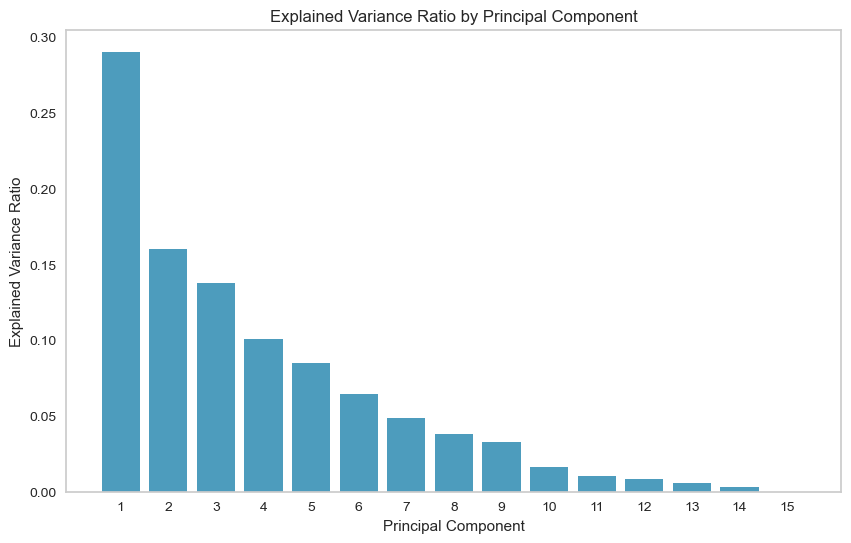

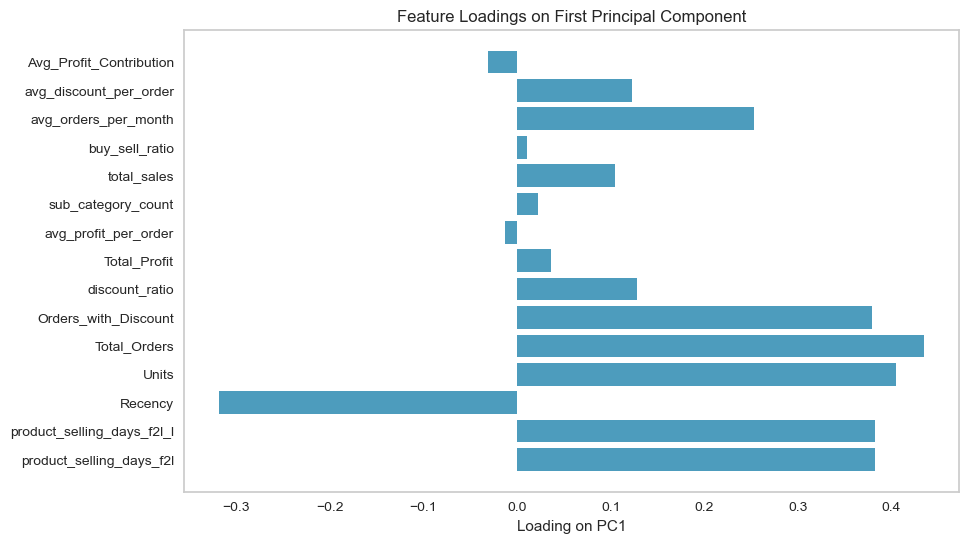


Top 10 important features for clustering based on PCA:
['Total_Orders', 'Units', 'product_selling_days_f2l', 'product_selling_days_f2l_l', 'Orders_with_Discount', 'Recency', 'avg_orders_per_month', 'discount_ratio', 'avg_discount_per_order', 'total_sales']


c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


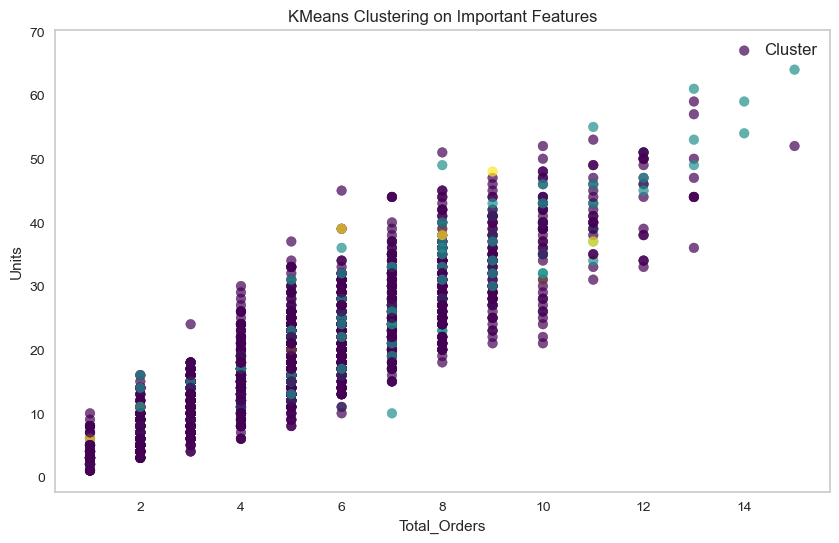

In [8]:
# Use Principal Component Analysis (PCA) to evaluate feature importance for clustering

from sklearn.decomposition import PCA

# Select only numeric columns for PCA
numeric_df = df.select_dtypes(include=[np.number])

# Standardize the data before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_df_scaled = scaler.fit_transform(numeric_df)

# Fit PCA
pca = PCA()
pca.fit(numeric_df_scaled)

# Display explained variance ratio and feature contributions (loadings)
explained_variance = pca.explained_variance_ratio_
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(numeric_df.columns))],
    index=numeric_df.columns
)

print("Explained variance ratio by principal components:")
print(explained_variance)
print("\nFeature contributions to the first principal component:")
print(loadings['PC1'].sort_values(ascending=False))

# Visualize the explained variance ratio
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()
# Visualize the loadings of the first two principal components
plt.figure(figsize=(10, 6))
plt.barh(loadings.index, loadings['PC1'], alpha=0.7)
plt.xlabel('Loading on PC1')
plt.title('Feature Loadings on First Principal Component')
plt.grid()
plt.show()
# Use the explained variance ratio and loadings to identify important features for clustering
# Features with high loadings on the first few principal components are likely to be important for clustering
# Select features with high loadings on the first principal component
important_features = loadings['PC1'].abs().nlargest(10).index.tolist()
print("\nTop 10 important features for clustering based on PCA:")
print(important_features)
# Use the important features for clustering
from sklearn.cluster import KMeans
# Fit KMeans clustering using the important features
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(numeric_df[important_features])
# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df[important_features[0]], df[important_features[1]], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel(important_features[0])
plt.ylabel(important_features[1])
plt.title('KMeans Clustering on Important Features')
plt.legend(*plt.gca().get_legend_handles_labels(), title="Cluster")
plt.grid()
plt.show()


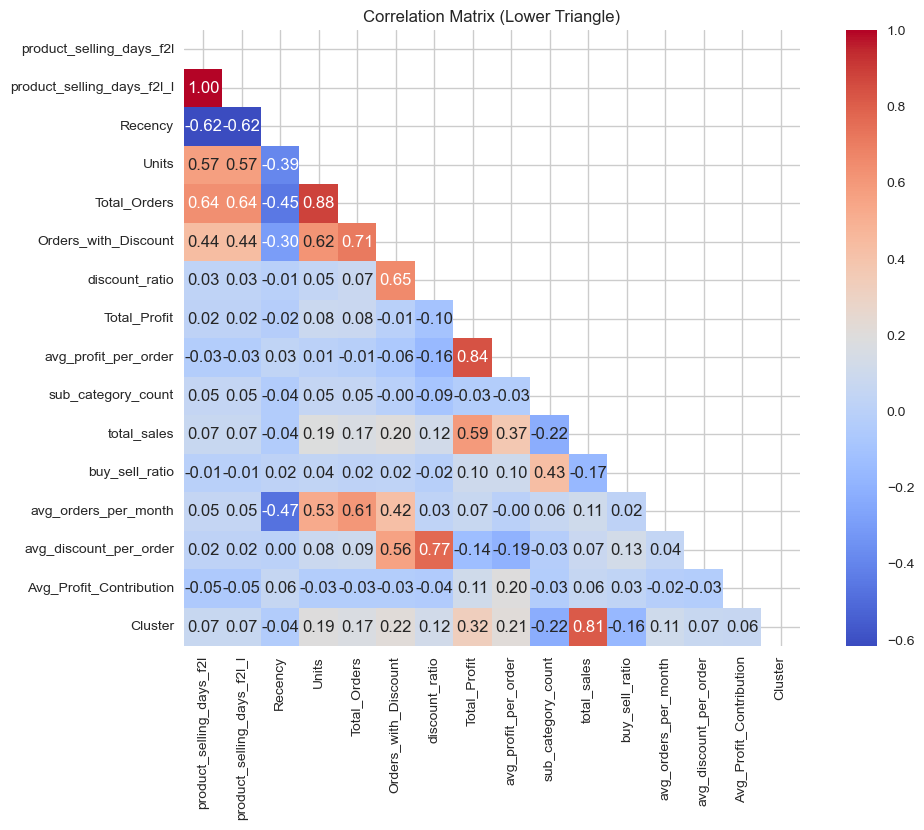

In [9]:
import seaborn as sns

# Compute and display the correlation matrix for df
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix (Lower Triangle)")
plt.show()

In [10]:
df = df[['product_id', 'Total_Orders', 'avg_discount_per_order', 'total_sales', 'Recency']]

df

,product_id,Total_Orders,avg_discount_per_order,total_sales,Recency
0,FUR-BO-10000112,1,0.300000,825.174,117
1,FUR-BO-10000330,3,0.100000,1064.624,214
2,FUR-BO-10000362,5,0.130000,2154.348,574
3,FUR-BO-10000468,6,0.183333,723.842,11
4,FUR-BO-10000711,2,0.000000,851.760,1229
...,...,...,...,...,...
1889,TEC-PH-10004912,3,0.133333,516.530,29
1890,TEC-PH-10004922,5,0.120000,1085.238,344
1891,TEC-PH-10004924,3,0.066667,56.164,497
1892,TEC-PH-10004959,2,0.100000,341.666,849


Outlier treatment

In [11]:
# copy from wine or bike data set or Copilot (1.5 IQR)
# Outlier treatment using 1.5*IQR rule for each numerical column
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.reset_index(drop=True, inplace=True)

df

# Comment: Takes out 857 rows out of 1894 rows (~45% of the data), if applied with all numerical columns still included
# Comment: Takes out 473 rows out of 1894 rows (~25% of the data), if applied with all numerical columns still included


,product_id,Total_Orders,avg_discount_per_order,total_sales,Recency
0,FUR-BO-10000112,1,0.300000,825.174,117
1,FUR-BO-10000330,3,0.100000,1064.624,214
2,FUR-BO-10000362,5,0.130000,2154.348,574
3,FUR-BO-10000468,6,0.183333,723.842,11
4,FUR-BO-10001519,5,0.170000,1119.195,21
...,...,...,...,...,...
1448,TEC-PH-10004897,7,0.142857,257.742,273
1449,TEC-PH-10004908,7,0.228571,1665.804,48
1450,TEC-PH-10004912,3,0.133333,516.530,29
1451,TEC-PH-10004922,5,0.120000,1085.238,344


Attention : Limit to less columns first, and the IQR -> Anticipated effect: less records deleted.

Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

# Rescaling the attributes
rfm_df = df[['Total_Orders', 'avg_discount_per_order', 'total_sales', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Total_Orders', 'avg_discount_per_order', 'total_sales', 'Recency']
rfm_df_scaled.head()


,Total_Orders,avg_discount_per_order,total_sales,Recency
0,-1.853319,1.879711,0.471513,-0.189951
1,-0.985490,-0.234173,0.849145,0.475337
2,-0.117662,0.082910,2.567731,2.944445
3,0.316253,0.646612,0.311703,-0.916966
4,-0.117662,0.505687,0.935208,-0.848380


## Dimensional Visualizations

Inspect your data and consider outlier removal and standardization/normalization.

In [13]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(
    go.Scatter(
        x=rfm_df_scaled["Total_Orders"], 
        y=rfm_df_scaled["avg_discount_per_order"], 
        mode="markers"
    ),
    row=1, col=1,
)

fig.update_xaxes(title_text="Total_Orders", row=1, col=1)
fig.update_yaxes(title_text="avg_discount_per_order", row=1, col=1)

fig.add_trace(
    go.Scatter(
        x=rfm_df_scaled["Total_Orders"], 
        y=rfm_df_scaled["total_sales"], 
        mode="markers"
    ),
    row=1, col=2
)

fig.update_xaxes(title_text="Total_Orders", row=1, col=2)
fig.update_yaxes(title_text="total_sales", row=1, col=2)

fig.add_trace(
    go.Scatter(
        x=rfm_df_scaled["avg_discount_per_order"], 
        y=rfm_df_scaled["total_sales"], 
        mode="markers"
    ),
    row=1, col=3
)

fig.update_xaxes(title_text="avg_discount_per_order", row=1, col=3)
fig.update_yaxes(title_text="total_sales", row=1, col=3)

In [14]:
px.scatter_3d(rfm_df_scaled, x="Total_Orders", y="avg_discount_per_order", z="total_sales", width=600, height=500)

## Elbow method

In [15]:
inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=420).fit(rfm_df_scaled.values)
    inertia.append(kmeans.inertia_)
    
inertia

c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.

c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

[5812.0,
 4482.843013496086,
 3508.2769005112527,
 2816.648578836302,
 2366.934405523386,
 2138.2941993750846,
 1975.2271992295946,
 1839.6639052850353,
 1739.9514614561465]

In [16]:
px.line(
    x=range(1,10), 
    y=inertia,
    labels={
        "y": "Inertia", 
        "x": "Cluster #"
    },
    width=500, height=300
)

## Silhouette Analysis

[Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html) comes from the `yellowbrick` package, which will need to be installed in your Anaconda Environment.

In [17]:
k_clusters = 4 # increment to compare different cluster #s
kmeans = KMeans(n_clusters=k_clusters, random_state=420) 
silhouette_avg = silhouette_score(rfm_df_scaled, kmeans.fit_predict(rfm_df_scaled.values))
silhouette_avg

c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



0.31132374990468165

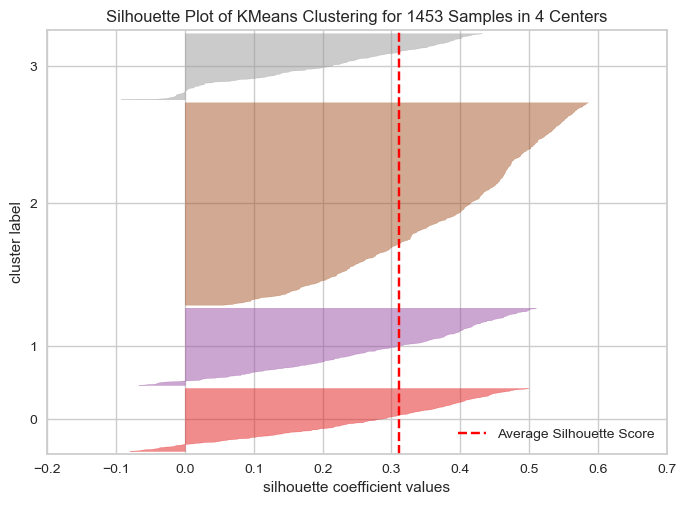

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1453 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(rfm_df_scaled.values)
visualizer.show()

In [19]:
# modify rfm_df_scaled and add cluster labels
df_preds = rfm_df_scaled.copy()
df_preds["cluster"] = kmeans.labels_

px.scatter_3d(
    df_preds, 
    x="Total_Orders", y="avg_discount_per_order", z="total_sales", 
    height=500, width=600, color="cluster", 
    title=f"{k_clusters} Clusters | Silhouette Average: {silhouette_avg}"
)

## DBSCAN

1. Logic to find best setting for DBSCAN

In [20]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [21]:
neighbors = NearestNeighbors(n_neighbors=6) # 2*3 features = 6 | textbook says 2*number of features
# fit the model
neighbors_fit = neighbors.fit(rfm_df_scaled)
distances, indices = neighbors_fit.kneighbors(rfm_df_scaled)

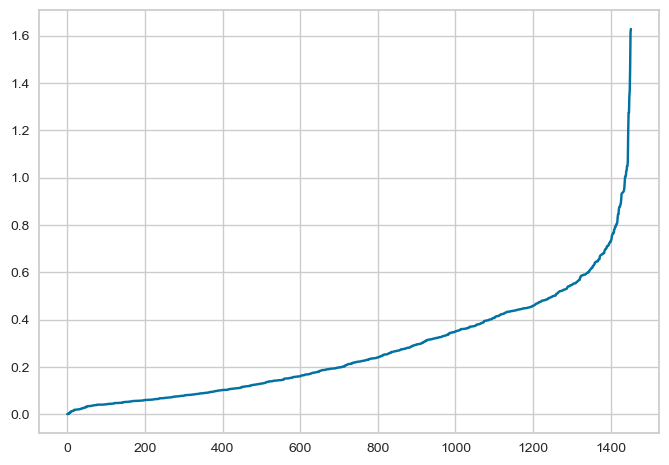

In [22]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# Points sorted by distance to the 6th nearest neighbor (see setting above)

2. Using DB Scan

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# DBSCAN does not require the number of clusters to be set explicitly.
# Instead, it uses the parameters 'eps' (maximum distance between two samples for them to be considered as in the same neighborhood)
# and 'min_samples' (number of samples in a neighborhood for a point to be considered as a core point).

dbscan = DBSCAN(eps=0.8, min_samples=8)  # Number of clusters is NOT set here
dbscan_labels = dbscan.fit_predict(rfm_df_scaled)

# Observation1: (eps=0.5, min_samples=5) brought out 8 clusters & 0.031 silhouette score
# Observation2: (eps=0.5, min_samples=60) brought out 2 clusters & 0.359 silhouette score
# Observation3: (eps=0.5, min_samples=65) brought out 2 clusters & 0.439 silhouette score
# Observation3: (eps=0.5, min_samples=66) brought out 2 clusters & 0.445 silhouette score

# Add DBSCAN cluster labels to the dataframe
df_preds['dbscan_cluster'] = dbscan_labels

print(f"DBSCAN identified {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)} clusters (excluding noise).")

# Visualize DBSCAN clusters in 3D
# Compute silhouette average (excluding noise points, i.e., dbscan_cluster == -1)
mask = df_preds["dbscan_cluster"] != -1
if mask.sum() > 1 and len(set(df_preds.loc[mask, "dbscan_cluster"])) > 1:
    dbscan_silhouette_avg = silhouette_score(
        rfm_df_scaled.loc[mask], df_preds.loc[mask, "dbscan_cluster"]
    )
    db_index_dbscan = davies_bouldin_score(rfm_df_scaled.loc[mask], df_preds.loc[mask, "dbscan_cluster"])
    plot_title = "DBSCAN Clustering on RFM Data"
else:
    dbscan_silhouette_avg = None
    db_index_dbscan = None
    plot_title = "DBSCAN Clustering on RFM Data"

fig = px.scatter_3d(
    df_preds,
    x="Total_Orders", y="avg_discount_per_order", z="total_sales",
    color="dbscan_cluster",
    height=500, width=600,
    title=plot_title
)
fig.show()

if dbscan_silhouette_avg is not None and db_index_dbscan is not None:
    n_clusters_identified = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    print(f"Silhouette Avg (excluding noise): {dbscan_silhouette_avg:.3f}")
    print(f"Davies-Bouldin Index (excluding noise): {db_index_dbscan:.3f}")
    print(f"Number of clusters identified (excluding noise): {n_clusters_identified}")
else:
    print("Silhouette Avg: N/A (not enough clusters)")
    print("Davies-Bouldin Index: N/A (not enough clusters)")



DBSCAN identified 1 clusters (excluding noise).


Silhouette Avg: N/A (not enough clusters)
Davies-Bouldin Index: N/A (not enough clusters)


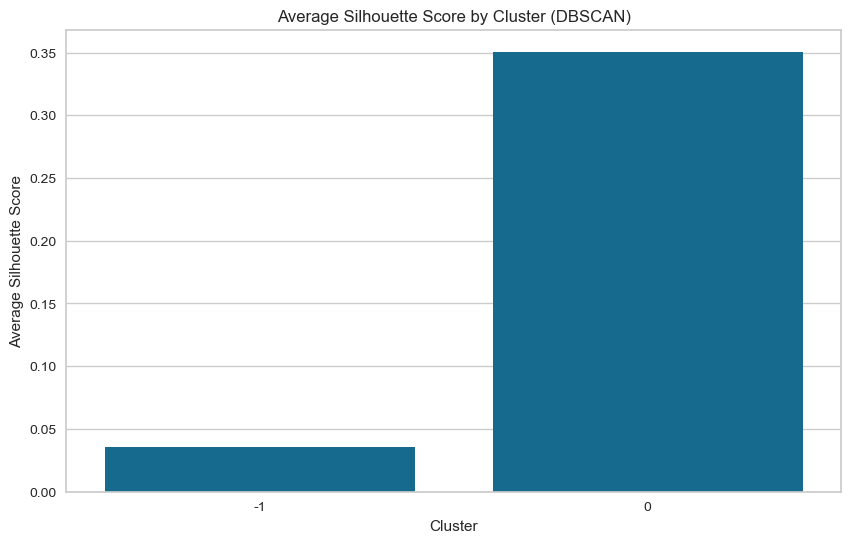

Cluster category = -1 refers to noise points (outliers) detected by DBSCAN.


In [24]:
# Calculate silhouette score for each cluster
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(rfm_df_scaled, df_preds['dbscan_cluster'])
# Create a DataFrame for silhouette scores
silhouette_df = pd.DataFrame({
    'Silhouette Score': silhouette_vals,
    'Cluster': df_preds['dbscan_cluster']
})
# Calculate average silhouette score for each cluster
silhouette_avg_per_cluster = silhouette_df.groupby('Cluster')['Silhouette Score'].mean().reset_index()
# Plot silhouette scores by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Silhouette Score', data=silhouette_avg_per_cluster)
plt.title('Average Silhouette Score by Cluster (DBSCAN)')
plt.xlabel('Cluster')
plt.ylabel('Average Silhouette Score')
plt.show()
# Save the dataframe with cluster labels to a CSV file 
df_preds.to_csv('Archive/df_product_active_clusters.csv', index=False)

# In DBSCAN, cluster label -1 indicates noise points (outliers) that do not belong to any cluster.
# All samples assigned to cluster -1 are considered noise by the DBSCAN algorithm.
print("Cluster category = -1 refers to noise points (outliers) detected by DBSCAN.")

# Fuzzy C means

In [25]:
# Fuzzy K-Means (Fuzzy C-Means) clustering


import skfuzzy as fuzz
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Transpose the data for skfuzzy (features x samples)
data = rfm_df_scaled.values.T

# Set number of clusters (e.g., 2 for comparison)
n_clusters = 5

# Run fuzzy c-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None, seed=42
)

# Assign each sample to the cluster with highest membership
fuzzy_labels = np.argmax(u, axis=0)

# Add fuzzy cluster labels to df_preds
df_preds['fuzzy_cluster'] = fuzzy_labels

# Visualize fuzzy clusters in 3D
fig = px.scatter_3d(
    df_preds,
    x="Total_Orders", y="avg_discount_per_order", z="total_sales",
    color="fuzzy_cluster",
    height=500, width=600,
    title=f"Fuzzy C-Means Clustering (n_clusters={n_clusters})"
)
fig.show()

# Calculate silhouette score and Davies-Bouldin index for fuzzy clusters
silhouette_fuzzy = silhouette_score(rfm_df_scaled, fuzzy_labels)
db_index_fuzzy = davies_bouldin_score(rfm_df_scaled, fuzzy_labels)

print(f"Silhouette Score (Fuzzy C-Means, n_clusters={n_clusters}): {silhouette_fuzzy:.3f}")
print(f"Davies-Bouldin Index (Fuzzy C-Means, n_clusters={n_clusters}): {db_index_fuzzy:.3f}")

Silhouette Score (Fuzzy C-Means, n_clusters=5): 0.258
Davies-Bouldin Index (Fuzzy C-Means, n_clusters=5): 1.101


# Hierarchical clustering

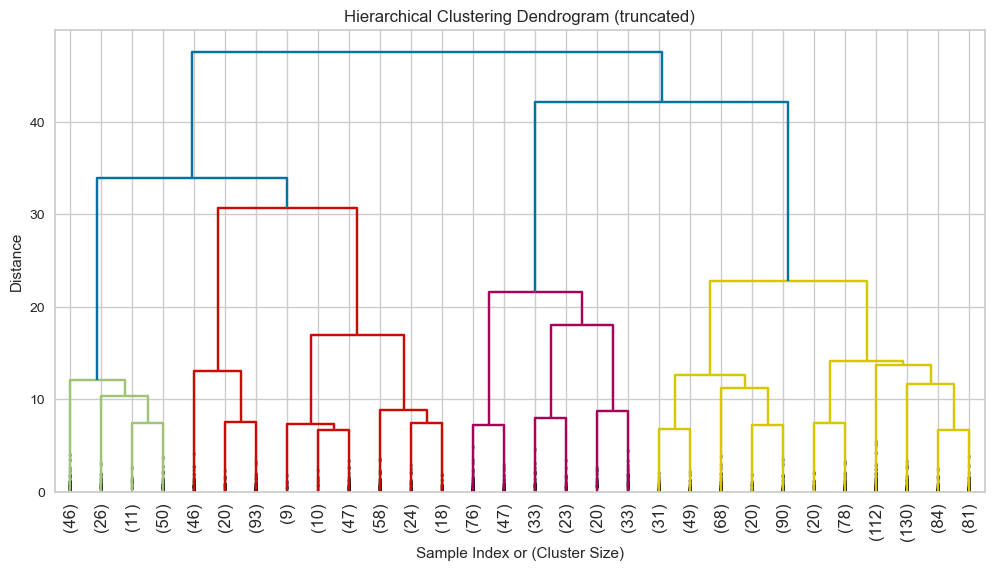

Silhouette Score (Hierarchical, n_clusters=2): 0.236
Davies-Bouldin Index (Hierarchical, n_clusters=2): 1.828


In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Please apply hierarchical clustering method to rfm_df_scaled

import matplotlib.pyplot as plt

# Perform hierarchical clustering using Ward's method
Z = linkage(rfm_df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

# Assign cluster labels (e.g., 2 clusters for comparison)
n_clusters = 2
hierarchical_labels = fcluster(Z, n_clusters, criterion='maxclust')

# Add hierarchical cluster labels to df_preds
df_preds['hierarchical_cluster'] = hierarchical_labels

# Visualize clusters in 3D
px.scatter_3d(
    df_preds,
    x="Total_Orders", y="avg_discount_per_order", z="total_sales",
    color="hierarchical_cluster",
    height=500, width=600,
    title=f"Hierarchical Clustering (n_clusters={n_clusters})"
)

# Calculate silhouette score
sil_score = silhouette_score(rfm_df_scaled, hierarchical_labels)
# Calculate Davies-Bouldin index
db_index = davies_bouldin_score(rfm_df_scaled, hierarchical_labels)

print(f"Silhouette Score (Hierarchical, n_clusters={n_clusters}): {sil_score:.3f}")
print(f"Davies-Bouldin Index (Hierarchical, n_clusters={n_clusters}): {db_index:.3f}")